# Grasp

![2021-07-13-14-19-14](https://raw.githubusercontent.com/hujunhan/cloudimage/master/img/2021-07-13-14-19-14.jpg)

## 1 Find Feature

Assume we have remove the object from previous step

Now we can analyze the image, and get some feature

* Point feature
* Contour feature

### 1.1 Find Point Feature

In [2]:
import numpy as np
import cv2
with open('data.npy', 'rb') as f:
    rgb=np.load(f)
    depth=np.load(f)
    points=np.load(f)
rgb=cv2.cvtColor(rgb,cv2.COLOR_BGR2RGB)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

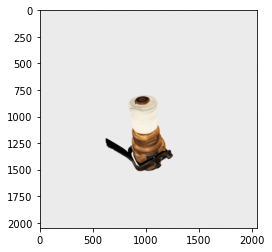

In [31]:
plt.imshow(rgb)

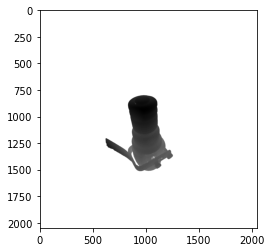

In [32]:
plt.imshow(depth,cmap='gray')

Text(0.5, 1.0, 'Time Usage /ms')

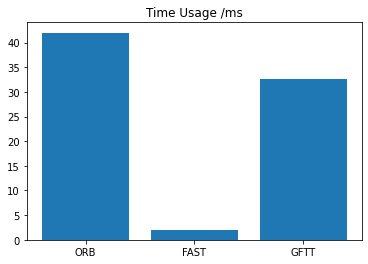

In [33]:
t=[42,2.03,32.7]
x=['ORB','FAST','GFTT']
plt.figure()
plt.bar(x,t)
plt.title('Time Usage /ms')

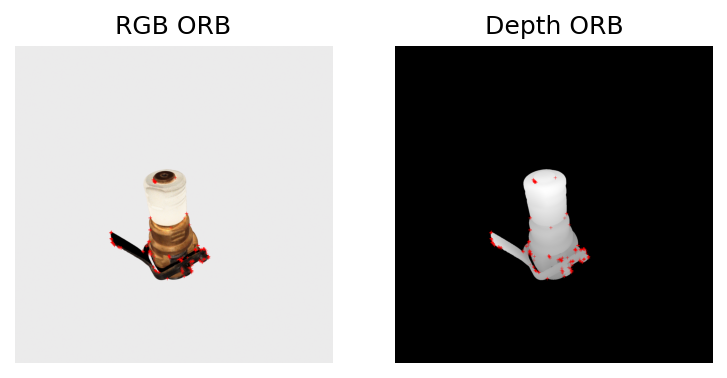

In [34]:
orb = cv2.ORB_create()
kp,dp=orb.detectAndCompute(rgb,None)
rgb_feature=rgb.copy()
depth_feature=depth.copy()
depth_feature=(1-depth_feature)/np.amax(1-depth_feature)*255
depth_feature=cv2.cvtColor(depth_feature,cv2.COLOR_GRAY2BGR)
for key in kp:
    pt=key.pt
    x=int(pt[0])
    y=int(pt[1])
    rgb_feature=cv2.drawMarker(rgb_feature,(x,y),(255,0,0))
    depth_feature=cv2.drawMarker(depth_feature,(x,y),(255,0,0))
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('RGB ORB')
plt.imshow(rgb_feature)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Depth ORB')
plt.imshow(depth_feature.astype(int))

In [35]:
dp

array([[ 44, 229, 161, ..., 115, 198, 226],
       [122,   1, 116, ..., 132,  98,   2],
       [ 28, 205, 114, ..., 217, 194,   1],
       ...,
       [ 66, 241, 176, ...,  92, 227, 139],
       [ 24, 223,  98, ..., 244, 105, 217],
       [104, 107,  67, ..., 144,  70, 232]], dtype=uint8)

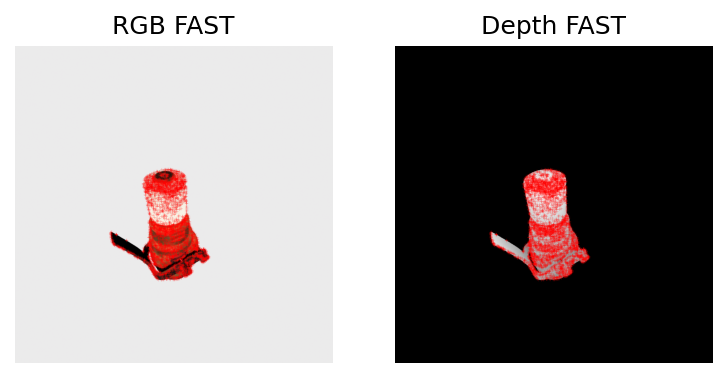

In [36]:
fast = cv2.FastFeatureDetector_create()
kp=fast.detect(rgb,None)
rgb_feature=rgb.copy()
depth_feature=depth.copy()
depth_feature=(1-depth_feature)/np.amax(1-depth_feature)*255
depth_feature=cv2.cvtColor(depth_feature,cv2.COLOR_GRAY2BGR)
for key in kp:
    pt=key.pt
    x=int(pt[0])
    y=int(pt[1])
    rgb_feature=cv2.drawMarker(rgb_feature,(x,y),(255,0,0))
    depth_feature=cv2.drawMarker(depth_feature,(x,y),(255,0,0))
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('RGB FAST')
plt.imshow(rgb_feature)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Depth FAST')
plt.imshow(depth_feature.astype(int))

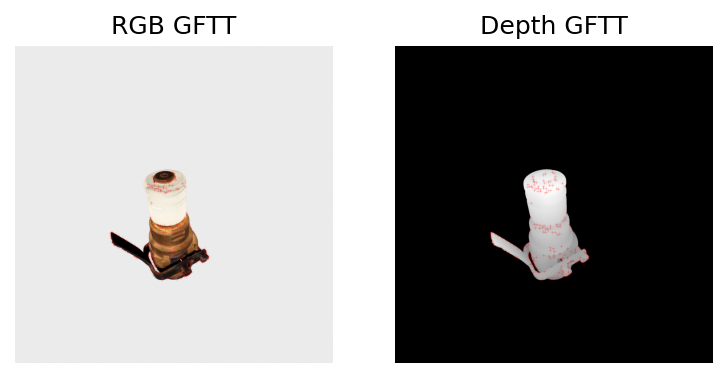

In [37]:
kp=cv2.goodFeaturesToTrack(cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY),200,0.01,10)
rgb_feature=rgb.copy()
depth_feature=depth.copy()
depth_feature=(1-depth_feature)/np.amax(1-depth_feature)*255
depth_feature=cv2.cvtColor(depth_feature,cv2.COLOR_GRAY2BGR)
for key in kp:
    pt=key
    x=int(pt[0][0])
    y=int(pt[0][1])
    rgb_feature=cv2.drawMarker(rgb_feature,(x,y),(255,0,0))
    depth_feature=cv2.drawMarker(depth_feature,(x,y),(255,0,0))
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('RGB GFTT')
plt.imshow(rgb_feature)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Depth GFTT')
plt.imshow(depth_feature.astype(int))

From my observation, the GFTT is a good feature to track

### 1.2 Contour Feature

In [86]:
im = rgb.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(imgray, 140, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
sorted_contours = sorted(contours, key=len,reverse=True)

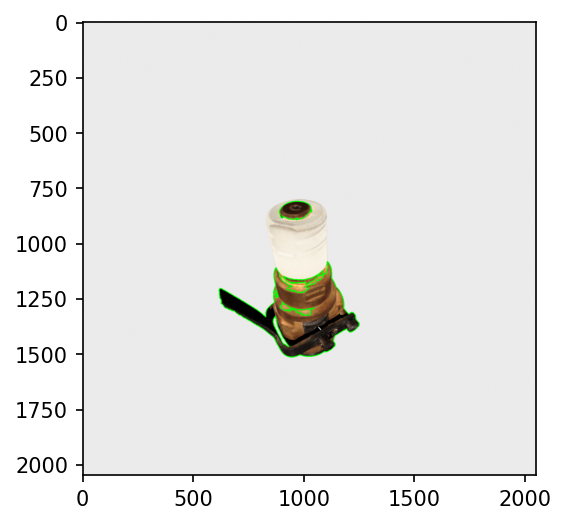

In [88]:
cv2.drawContours(im, sorted_contours[0:5], -1, (0,255,0), 3)
plt.figure(dpi=150)
plt.imshow(im)

## 2 Match the feature with 3D Model

## 3 Calculate the Pose of the object (subject to camera)

Once we match the 2D points with 3D points, we can estimate the pose using PNP algorithm

![2021-07-09-15-37-25](https://raw.githubusercontent.com/hujunhan/cloudimage/master/img/2021-07-09-15-37-25.png)

https://zhuanlan.zhihu.com/p/59070440

In [38]:
from virtual_camera import VirtualCamera
## Setup a camera
rx=0.2
ry=0.3
rz=0.4
x=0
y=0
z=800
W,H=2048,2048
focal=1024
cam = VirtualCamera(rx, ry, rz,x, y, z, focal*3.45e-6, [W, H])
cam.look_at(model_center)
print(cam.RT_world_in_camera)

[[-9.80211217e-01 -2.48062644e-03 -1.25816979e-03  1.00653583e+00]
 [-2.48062644e-03 -9.95559996e-01 -7.98316760e-03  6.38653408e+00]
 [ 1.25816979e-03  7.98316760e-03 -9.95950950e-01  7.96760760e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-9.80211217e-01 -2.48062644e-03 -1.25816979e-03  1.00653583e+00]
 [-2.48062644e-03 -9.95559996e-01 -7.98316760e-03  6.38653408e+00]
 [ 1.25816979e-03  7.98316760e-03 -9.95950950e-01  7.96760760e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [39]:
## Project to pixels
points=points.reshape(-1,3)
ans= cam.project_world_to_pixel(points)
model_center=np.sum(points,0)/len(points)
print(model_center)

[  5.28968233  33.56337202 423.57384865]


In [40]:
obj_points=points[0:50,:]
img_points=ans[0:50,0:2].astype(float)
cam_intri=np.asarray([[1024,0.,1024],
                     [0,1024,1024],
                     [0,0,1]])
dist=None

In [41]:
cameraMatrix, rvec, tvec,x=cv2.solvePnPRansac(obj_points,img_points,cam_intri,dist)

In [42]:
tvec

array([[ 6.07536167e-01],
       [ 1.75029036e+00],
       [-8.03955639e+02]])

In [43]:
rot,jac=cv2.Rodrigues(rvec)
print(rot)

[[ 0.99999659  0.00134126 -0.00223961]
 [-0.00136241  0.99995425 -0.00946821]
 [ 0.0022268   0.00947123  0.99995267]]


## 4 Calculate the Manipulation Point